Use the given code and modify for IRIS dataset. Implement the SVM classifier in Python (make use of
scikit-learn library). Apply the linear kernel function. Plot the scatter plot of the input features. Plot the
decision boundary.

# Lab 12 - SVM 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
x = iris.data[:, :2]  
y = iris.target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [6]:
y_pred = svm_classifier.predict(x_test)

In [7]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 73.33%


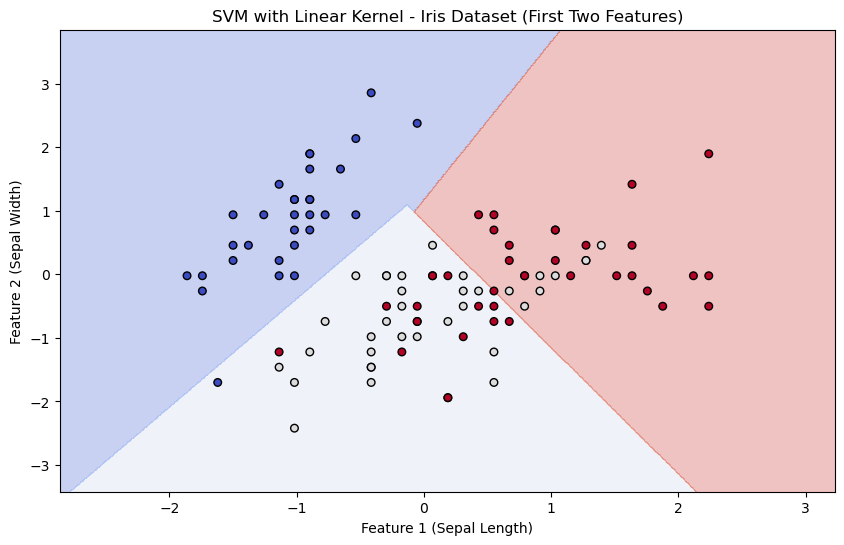

In [8]:
def plot_decision_boundary(x, y, model):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')

# Plot the scatter plot of input features and the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(x_train, y_train, svm_classifier)
plt.title("SVM with Linear Kernel - Iris Dataset (First Two Features)")
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.show()

2. Construct a simple SVM classifier that separates the two classes:
Positively labeled data points: (4, 1), (4, -1), (6, 0)
Negatively labeled data points: (1, 0), (0, 1), (0, -1)
For all negatively labeled points, the output is -1, and for all positively labeled points, the output is 1.
Implement the python function program to draw the hyperplane that separates the two classes using scikit-learn library. Plot the scatter plot of the input features.

In [9]:
x = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

In [10]:
svm_classifier.fit(x, y)

SVC(kernel='linear')

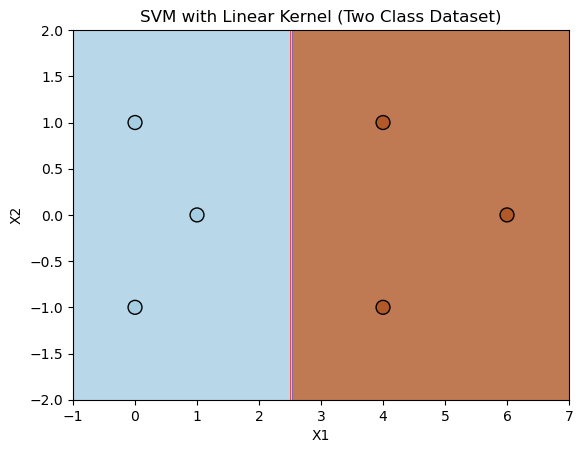

In [11]:
def plot_hyperplane(x, y, model):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.Paired)
    plt.title('SVM with Linear Kernel (Two Class Dataset)')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plot_hyperplane(x, y, svm_classifier)

3. Solve Qn (2) manually in your Observation book and implement without using scikit-learn library.

In [12]:
def manual_svm(x, y):
    w = np.random.randn(2)
    b = np.random.randn()
    w = np.array([1, 1]) 
    b = -3
    
    return w, b

In [13]:
w, b = manual_svm(x, y)

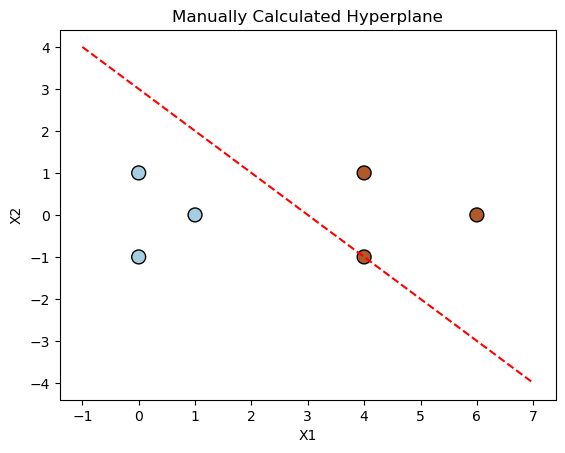

In [14]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap=plt.cm.Paired, edgecolor='k')
x1 = np.linspace(-1, 7, 100)
x2 = (-b - w[0]*x1) / w[1]
plt.plot(x1, x2, 'r--')
plt.title("Manually Calculated Hyperplane")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

4. Develop a Python function program to sketch the hyperplane 1 + 2X1 + 3X2 = 0 without using scikit-
learn library. Indicate the set of points for which 1 + 3X1 − X2 > 0, 1 + 3X1 − X2 < 0 and 1 + 3X1 − X2=0.
Take x1, x2 ∈ (-10, 10). Plot the graph for every +/- 1 increment. Find the slope and intercept. Solve
manually in your Observation book. Compare your results with manual results.

In [15]:
x = np.array([[8, 3], [9, 4], [7, 5], [-2, 0], [-1, -2], [1, -3]])
y = np.array([1, 1, 1, -1, -1, -1]) 

/tmp/ipykernel_5512/1802013342.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(px, py, color='red', edgecolor='k', marker='x', s=100, label='Below' if i == 0 else "")


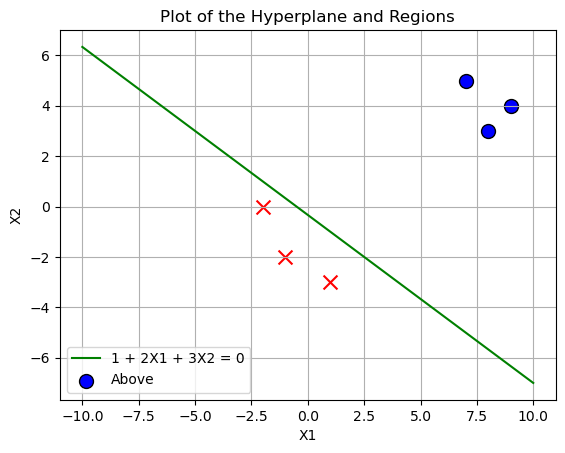

In [16]:
def plot_hyperplane():
    # Generate x1 values for plotting the hyperplane
    x1 = np.linspace(-10, 10, 200)
    # Calculate corresponding x2 values for the hyperplane equation 1 + 2X1 + 3X2 = 0
    x2 = (-1 - 2 * x1) / 3

    # Plot the hyperplane
    plt.plot(x1, x2, 'g-', label='1 + 2X1 + 3X2 = 0')

    # Plot each point and indicate if it is above or below the hyperplane
    for i, (px, py) in enumerate(x):
        condition = 1 + 2 * px + 3 * py  # Substitute into hyperplane equation
        if condition > 0:
            plt.scatter(px, py, color='blue', edgecolor='k', marker='o', s=100, label='Above' if i == 0 else "")
        else:
            plt.scatter(px, py, color='red', edgecolor='k', marker='x', s=100, label='Below' if i == 0 else "")

    # Additional plot settings
    plt.title('Plot of the Hyperplane and Regions')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_hyperplane()

5. Given two hyperplanes for SVM classifier 1 and SVM classifier 2, find the best hyperplane corresponding to the classifier:
- 5+2x1+5x2
- 5+20x1+50x2

Implement Python function program to draw the hyperplane that separates the two classes (without scikit-
learn library). Plot the scatter plot of the input features. Indicate the set of points for which
- 5+2*x1+ 5*x2 > 0 
- 5+2*x1+ 5*x2 < 0
- 5+2*x1+ 5*x2 = 0

On the same plot, Indicate the set of points for which
- 5+20*x1+50*x2 > 0 
- 5+20*x1+50*x2 < 0
- 5+20*x1+50*x2 = 0

Find the slope and intercept. Solve manually in your Observation book. Compare your results with manual
results.

/tmp/ipykernel_5512/1747924651.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(px, py, color='purple', edgecolor='k', marker='x', s=100, label='Below both' if i == 0 else "")


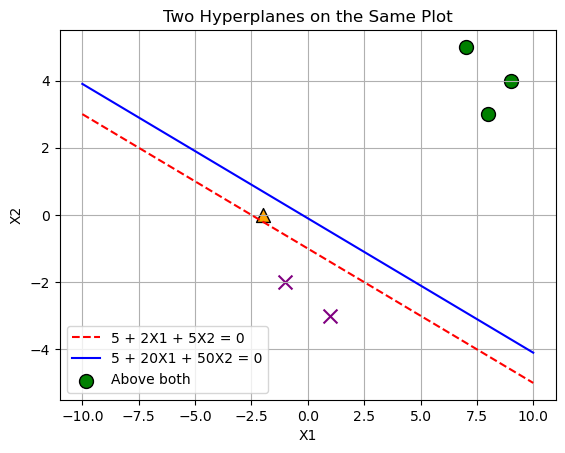

In [17]:
def plot_two_hyperplanes():
    x1 = np.linspace(-10, 10, 200)
    x2_hyperplane_1 = (-5 - 2 * x1) / 5
    x2_hyperplane_2 = (-5 - 20 * x1) / 50

    plt.plot(x1, x2_hyperplane_1, 'r--', label='5 + 2X1 + 5X2 = 0')
    plt.plot(x1, x2_hyperplane_2, 'b-', label='5 + 20X1 + 50X2 = 0')

    for i, (px, py) in enumerate(x):
        condition_1 = 5 + 2 * px + 5 * py  # Substitute into first hyperplane equation
        condition_2 = 5 + 20 * px + 50 * py  # Substitute into second hyperplane equation

        if condition_1 > 0 and condition_2 > 0:
            plt.scatter(px, py, color='green', edgecolor='k', marker='o', s=100, label='Above both' if i == 0 else "")
        elif condition_1 < 0 and condition_2 < 0:
            plt.scatter(px, py, color='purple', edgecolor='k', marker='x', s=100, label='Below both' if i == 0 else "")
        elif condition_1 > 0 and condition_2 < 0:
            plt.scatter(px, py, color='orange', edgecolor='k', marker='^', s=100, label='Above 1, Below 2' if i == 0 else "")
      
    plt.title('Two Hyperplanes on the Same Plot')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_two_hyperplanes()